<a href="https://colab.research.google.com/github/devansh-bhuwariya/SnP500-Trend-Analysis-and-Forecasting/blob/main/S%26P500_Trend_Analysis_and_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from statsmodels.tsa.seasonal import seasonal_decompose
from timeit import default_timer as timer
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.stattools import adfuller

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_predict


##**CHAPTER 1: INTRODUCTION**

Investigating the dynamics of financial markets demands a meticulous understanding of various influencing factors. The S&P 500, a prominent benchmark index comprising top U.S. publicly traded companies, encapsulates the complex interplay of economic indicators, investor sentiments, and global events. This project delves into the time series analysis of the S&P 500 dataset spanning a significant timeline, aiming to unravel patterns, trends, and potential forecasting insights within this cornerstone of financial indices.

The S&P 500 index serves as a barometer for the broader market sentiment, influenced by multifaceted elements such as macroeconomic indicators, geopolitical events, corporate performances, and investor behavior. Analyzing this dataset necessitates employing sophisticated time series models and techniques to decipher the underlying dynamics, anomalies, and fluctuations shaping the financial landscape.

From data preprocessing and cleansing to deploying advanced time series methodologies, this report encapsulates a comprehensive journey. Through rigorous analysis and model fitting, it seeks to extract meaningful insights, forecast potential trends, and identify critical factors steering the movements of this influential market index.

By harnessing historical data, this exploration endeavors to offer valuable predictive perspectives, aiding in decision-making processes for investors, financial analysts, and market observers navigating the complexities of the ever-evolving financial markets.

##**CHAPTER 2: DATA DESCRIPTION**

In [ ]:
df=pd.read_excel('Sp_500.xlsx')

In [ ]:
df.head(6)

,Date,Open,High,Low,Close,Adj Close
0,1990-01-02,353.399994,359.690002,351.980011,359.690002,359.690002
1,1990-01-03,359.690002,360.589996,357.890015,358.760010,358.760010
2,1990-01-04,358.760010,358.760010,352.890015,355.670013,355.670013
3,1990-01-05,355.670013,355.670013,351.350006,352.200012,352.200012
4,1990-01-08,352.200012,354.239990,350.540009,353.790009,353.790009
5,1990-01-09,353.829987,354.170013,349.609985,349.619995,349.619995


The dataset comprises six columns:

**Date**: Represents the date of trading for the S&P 500 index.

**Open**: Indicates the opening value of the index at the beginning of the trading day.

**High**: Denotes the highest value reached by the index during the trading day.

**Low**: Represents the lowest value observed by the index during the trading day.

**Close**: Signifies the closing value of the index at the end of the trading day.

**Adj Close**: Stands for the adjusted    closing price, considering factors such as dividends, stock splits, etc., offering a more accurate reflection of the index's performance.


Each row in the dataset corresponds to a specific trading day, providing a time series of the S&P 500 index's performance. These columns collectively depict the daily fluctuations and trends in the index's value, crucial for comprehensive time series analysis and forecasting within the realm of financial markets.

##**CHAPTER 3: OBJECTIVE**

Objective of the above Time series data includes :

1.**Data analysis and cleaning:**
>Organize and clean the S&P 500 dataset, addressing missing values and outliers to ensure data reliability for analysis.

2.**Trend Identification:**
> Analyze trends within the S&P 500 index data to understand its directional movements over time.

3.**Seasonality Checking:**
> Investigate potential seasonal patterns or cyclic behaviors influencing the S&P 500 index fluctuations across different time periods.

4.**Data Smoothening:**
> Apply data smoothing techniques to eliminate noise, facilitating clearer trend identification and pattern recognition.

5.**Parameter Identification:**
> Determine and optimize model parameters crucial for accurate time series modeling of the S&P 500 dataset.

6.**Model Fitting:**
> Select and fit appropriate time series models tailored to the unique characteristics of the S&P 500 data to capture its behavior effectively.

7.**Accuracy Matrix Calculation:**
> Evaluate model accuracy by calculating pertinent metrics to assess their effectiveness in representing S&P 500 movements.

8.**Future Price Forecasting:**
> Utilize developed models to forecast future trends and movements of the S&P 500 index, providing valuable insights for strategic decision-making in financial markets.

##**CHAPTER 4: DATA CLEANING**

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close
0,1990-01-02,353.399994,359.690002,351.980011,359.690002,359.690002
1,1990-01-03,359.690002,360.589996,357.890015,358.760010,358.760010
2,1990-01-04,358.760010,358.760010,352.890015,355.670013,355.670013
3,1990-01-05,355.670013,355.670013,351.350006,352.200012,352.200012
4,1990-01-08,352.200012,354.239990,350.540009,353.790009,353.790009


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8520 entries, 0 to 8519
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8520 non-null   datetime64[ns]
 1   Open       8520 non-null   float64       
 2   High       8520 non-null   float64       
 3   Low        8520 non-null   float64       
 4   Close      8520 non-null   float64       
 5   Adj Close  8520 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 399.5 KB


In [ ]:
df=df[df['Date']>='2000-01-01']
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True,drop=False)
df.head(6)

<ipython-input-7-de44733298c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date']=pd.to_datetime(df['Date'])


,Date,Open,High,Low,Close,Adj Close
Date,,,,,,
2000-01-03,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971
2000-01-04,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044
2000-01-05,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985
2000-01-06,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951
2000-01-07,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971
2000-01-10,2000-01-10,1441.469971,1464.359985,1441.469971,1457.599976,1457.599976


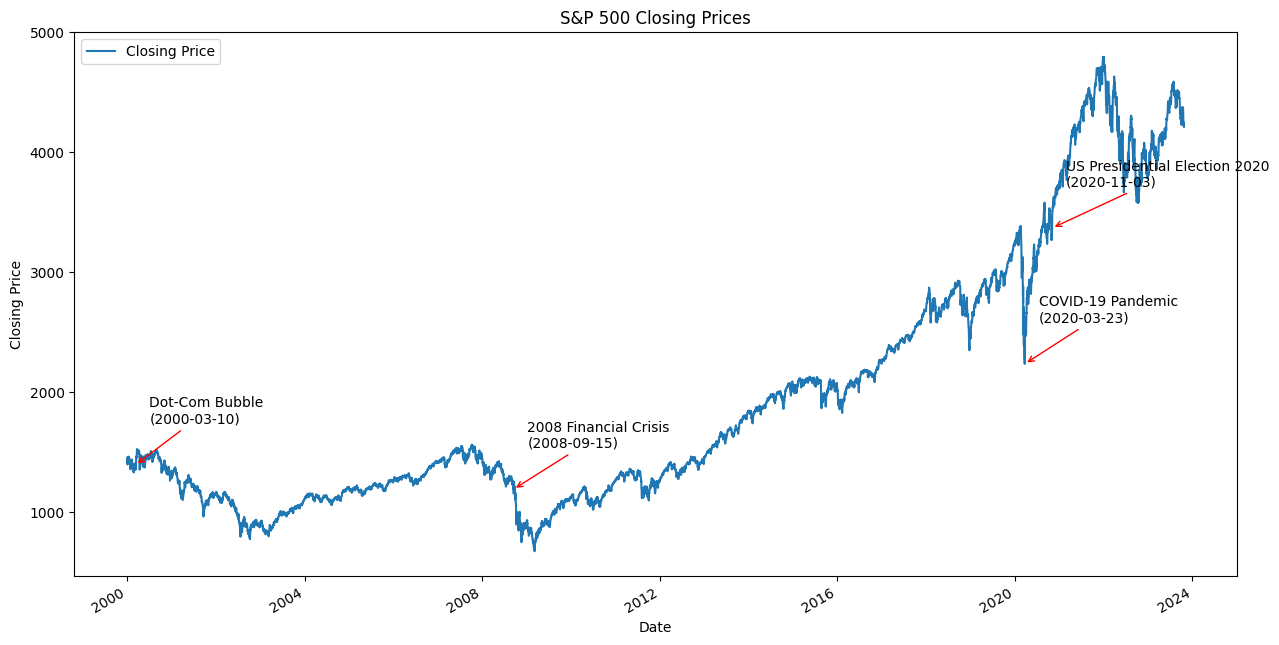

In [ ]:
import matplotlib.pyplot as plt

df['Close'].plot(figsize=(15, 8))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('S&P 500 Closing Prices')

major_events = {
    '2008 Financial Crisis': '2008-09-15',
    'COVID-19 Pandemic': '2020-03-23',
    'US Presidential Election 2020': '2020-11-03',
    'Dot-Com Bubble': '2000-03-10',
}

for event, date in major_events.items():
    plt.annotate(f'{event}\n({date})', xy=(date, df['Close'][date]), xytext=(10, 30),
                 textcoords='offset points', arrowprops=dict(arrowstyle='->', color='red'))
plt.legend(['Closing Price'], loc='upper left')

plt.show()


##**CHAPTER 5: DATA DECOMPOSITION**

Any Time Series data consists of 3 components :
1. Trend
2. Seasonal
3. Residual

Below code decomposes the time series data into those 3 components
over a period of 1 year.
This helps in Identifying seasonality & trend if present.

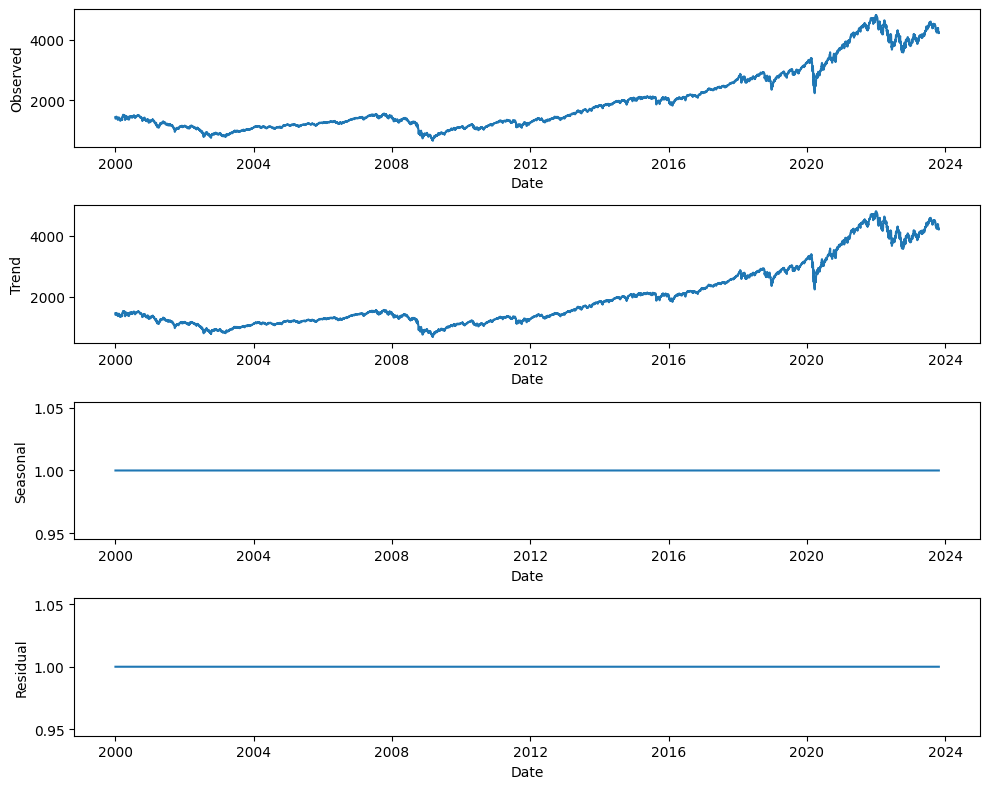

In [ ]:
decomposition = seasonal_decompose(df['Close'], model='multiplicative', period=1)

plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(decomposition.observed)
plt.xlabel('Date')
plt.ylabel('Observed')

plt.subplot(412)
plt.plot(decomposition.trend)
plt.xlabel('Date')
plt.ylabel('Trend')

plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.xlabel('Date')
plt.ylabel('Seasonal')

plt.subplot(414)
plt.plot(decomposition.resid)
plt.xlabel('Date')
plt.ylabel('Residual')

plt.tight_layout()  # Adjusts subplot parameters for better layout
plt.show()



**We conclude that the SnP500 Dataset has trends, but it does not have any seasonal and residual components**

##**CHAPTER 6: DATA SMOOTHENING**

**Since our data has trends but no seasonality, we apply double exponential smoothening**

In [ ]:
df=pd.read_excel('/content/Sp_500.xlsx')
df = df[df['Date'] >= '2000-01-01']
df['Date'] = pd.to_datetime(df['Date'])
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close
5987,2023-10-19,4321.359863,4339.540039,4269.689941,4278.000000,4278.000000
5988,2023-10-20,4273.850098,4276.560059,4223.029785,4224.160156,4224.160156
5989,2023-10-23,4210.399902,4255.839844,4189.220215,4217.040039,4217.040039
5990,2023-10-24,4235.790039,4259.379883,4219.430176,4247.680176,4247.680176
5991,2023-10-25,4232.419922,4232.419922,4213.169922,4213.169922,4213.169922


In [ ]:
X = df['Close']
train = df.Close[0:-30] #Data expected for last 30 days
test = df.Close[-30:] #Last 30 days to evaluate prediction

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}') #how close a regression line is to a set of points.
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}') # average magnitude of the errors in a set of predictions.
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}') #square root of the avg of squared diff bet pred and actual obs
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}') #statistical measure of how accurate a forecast is.
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n') #proportion of variance in dependent variable by the independent variable

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.model_selection import ParameterGrid
#dampening - decreasing future time trends on a straight line(no trend)
param_grid = {'smoothing_level': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90], 'smoothing_slope':[0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],'damped' : [True, False]}
pg = list(ParameterGrid(param_grid))

In [ ]:
df_results_moni = pd.DataFrame(columns=['smoothing_level', 'smoothing_slope', 'damping_slope','damped','RMSE','r2'])
start = timer()
for a,b in enumerate(pg):
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
    #fit1.summary
    z = fit1.forecast(30)
    df_pred=pd.DataFrame(z, columns=['Forecasted_result'])
    RMSE=np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))
    r2=metrics.r2_score(test, df_pred.Forecasted_result)
    df_results_moni=df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')


In [ ]:
print(f' Below mentioned parameter gives least RMSE and r2')
df_results_moni.sort_values(by=['RMSE','r2']).head(1)

In [ ]:
fit1 = Holt(train,damped =False ).fit(smoothing_level=0.3, smoothing_slope=0.7, damping_slope = 0.1 ,optimized=False)

In [ ]:
Forecast_custom_pred = fit1.forecast(30)
timeseries_evaluation_metrics_func(test,Forecast_custom_pred)

In [ ]:
fit1.summary()

In [ ]:
df_fcst_gs_pred = pd.DataFrame(Forecast_custom_pred, columns=['Close_grid_Search'])
df_fcst_gs_pred["new_index"] = range(5962,5992)
df_fcst_gs_pred = df_fcst_gs_pred.set_index("new_index")
df_fcst_gs_pred.index = df['Date'].iloc[-30:]

In [ ]:
# Automated Parameter
fitESAUTO = Holt(train).fit(optimized= True, use_brute = True)
fitESAUTOpred = fitESAUTO.forecast(30)
timeseries_evaluation_metrics_func(test,fitESAUTOpred)

In [ ]:
fitESAUTO.summary()

In [ ]:
df_fcst_auto_pred = pd.DataFrame(fitESAUTOpred, columns=['Close_auto_search'])
df_fcst_auto_pred["new_index"] = range(5962, 5992)
df_fcst_auto_pred = df_fcst_auto_pred.set_index("new_index")

df_fcst_auto_pred.index = df['Date'].iloc[-30:]

In [ ]:
df.set_index('Date',inplace=True,drop=False)
X = df['Close']
train = df.Close[0:-30] #Data expected for last 30 days
test = df.Close[-30:]

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(df_fcst_auto_pred, label='Automated grid search')
plt.plot(df_fcst_gs_pred, label='Double Exponential Smoothing with custom grid search')
plt.legend(loc='best')
plt.show()

##**CHAPTER 7: TESTING STATIONARITY**

In [ ]:
df=pd.read_excel('/content/Sp_500.xlsx')
df=df[df['Date']>='2000-01-01']
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True,drop=False)
df.head()

In [ ]:
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Results of Dickey-Fuller Test for column: {column_name}')
    dftest = adfuller(series, autolag='AIC') #AIC: Method to use when automatically determining the lag length among the values 0, 1, …, maxlag
    #The t-value measures the size of the difference relative to the variation in your sample data.
    #T is simply the calculated difference represented in units of standard error.
    #The greater the magnitude of T, the greater the evidence against the null hypothesis.

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 'No. of Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value #Critical values for the ADF test for 1%, 5%, and 10% significance levels with the constant model are −3.43, −2.87, and −2.57, respectively.
    print (dfoutput)
    significance_level = float(column_name.rstrip('%'))/100
    if dftest[1] <= significance_level:
        print("Conclusion:====>")
        print("Reject the null hypothesis")
        print("Data is stationary")
    else:
        print("Conclusion:====>")
        print("Fail to reject the null hypothesis")
        print("Data is non-stationary")

In [ ]:
Augmented_Dickey_Fuller_Test_func(df['Close'],'1%')

**The dataset is thus non stationary by ADF test.**

**Hence,we apply differencing to make the data stationary**

In [ ]:
df['Close'].diff().plot(figsize=(15,6))

In [ ]:
Augmented_Dickey_Fuller_Test_func(df['Close'].diff().dropna().values,'1%')

**Thus,the data becomes stationary after applying differencing**

##**CHAPTER 8:Justification why it is a time series problem**

**Reasons for classifying SnP500 dataset as a time-series data :**

1. **Trend in Movement:** The S&P 500 dataset typically exhibits long-term upward or downward movements reflecting the overall trend of the stock market. While it might have short-term fluctuations, there's a discernible trend over extended periods, showcasing the historical movement of the stock index.

2. **Continuous Time Stamps:** The dataset contains daily stock market values, representing the index's performance at each trading day. This continuity in timestamps, without gaps or irregular intervals, aligns with the time series structure.

3. **Seasonal Patterns:** Although the stock market might not strictly follow calendar-based seasons, there are observable recurring patterns within shorter periods, such as intraday patterns, daily or weekly cycles, monthly trends, or even periodic effects related to financial reporting cycles.

4. **Decomposability:** The S&P 500 dataset can be decomposed into distinct components – trend, seasonality, and residual (random fluctuations or noise). Through decomposition methods like moving averages or statistical techniques, we can separate these components, revealing underlying patterns and behaviors.

1. **Persistent Trends:** S&P 500 data shows ongoing movements that trend upwards or downwards, reflecting the market's overall trajectory.

2. **Continuous Timestamps:** The dataset offers daily values without breaks, representing the index's performance on each trading day.

3. **Recurring Patterns:** While not strictly seasonal, the data displays repetitive behaviors within shorter periods, like daily, weekly, or monthly cycles.

4. **Decomposability:** It allows decomposition into trend, seasonality, and noise, revealing distinct components within the dataset.

In [ ]:
df['Close'].plot(figsize=(17,6))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('S&P 500 Closing Prices')
plt.show()

##**CHAPTER 9 : Implementation & Forecasting**

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred , model_name):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print(f'Evaluation metric results for {model_name}:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

###**ARIMA MODEL**

**ARIMA**  is  a  method  among  several  used  for  forecasting  univariate  variables,  which  uses information obtained from the variable itself to predict its trend. The variables are regressed on its own past values.

**AR(p)** is where p equals the order of autocorrelation (designates weighted moving  average  over  past observations)

**I(d)**,  where  d  is  the  order  of  integration (differencing), which indicates linear trend or polynomial trend.

**MA(q)** is where q equals the order of moving averages (designates weighted moving average over past errors).

ARIMA is made up of two models: AR and MA.

**Integration (I) :**

> Time-series data is often nonstationary, and to make time-series stationary, the series needs to be differentiated. This process is known as the integration part (I), and the order of differencing is  signified  as  d.

> Differencing  eradicates  signals  with  time,  which  contains  trends  and seasonality, so this series contains noise and an irregular component, which will be modelledonly.

In [ ]:
plt.figure(1, figsize=(15,6))
plt.subplot(211)
df["Close"].hist()
plt.subplot(212)
df["Close"].plot(kind='kde')
plt.show()

In [ ]:
X = df[['Close' ]]
train, test = X[0:-30], X[-30:]
plt.title('S&P 500 Closing Prices')
plt.plot(train['Close'], label='Training set')
plt.plot(test['Close'], label='Test set', color='orange')
plt.legend();

In [ ]:
df=pd.read_excel('/content/Sp_500.xlsx')
df = df[df['Date'] >= '2000-01-01']
df['Date'] = pd.to_datetime(df['Date'])
df.reset_index(drop=True, inplace=True)
X = df[['Close' ]]
train, test = X[0:-30], X[-30:]

In [ ]:
stepwise_model = auto_arima(train,start_p=1, start_q=1,
    max_p=7, max_q=7, seasonal=False,
    d=None, trace=True,error_action='ignore',suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=55298.810, Time=1.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=55353.427, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=55299.710, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=55302.444, Time=1.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=55353.839, Time=0.10 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=55300.517, Time=5.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=55300.415, Time=2.46 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=55299.325, Time=0.83 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=55298.644, Time=0.67 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=55300.062, Time=0.78 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=55297.895, Time=6.68 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=55223.150, Time=11.62 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=55292.801, Time=1.26 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=55219.441, Time=15.29 sec
 ARIMA(5,1,0)(0,0

In [ ]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5962
Model:               SARIMAX(6, 1, 2)   Log Likelihood              -27570.121
Date:                Mon, 04 Dec 2023   AIC                          55158.243
Time:                        15:55:58   BIC                          55218.480
Sample:                             0   HQIC                         55179.168
                               - 5962                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5573      0.033    -46.826      0.000      -1.622      -1.492
ar.L2         -0.7787      0.034    -22.666      0.000      -0.846      -0.711
ar.L3         -0.0422      0.012     -3.598      0.000      -0.065      -0.019
ar.L4         -0.0403      0.011     -3.557      0.000      -0.062      -0.018
ar.L5         -0.0540      0.011     -4.842      0.000      -0.076      -0.032
ar.L6         -0.0656      0.008     -8.265      0.000      -0.081      -0.050
ma.L1          1.4857      0.032     45.857      0.000       1.422       1.549
ma.L2          0.6793      0.029     23.790      0.000       0.623       0.735
sigma2       609.2773      4.533    134.418      0.000     600.393     618.161
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             43655.39
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               7.82   Skew:                            -0.87
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Auto-ARIMA says **ARIMA(6,1,2)** is the optimal selection for the dataset.

Forecast both results and the confidence for the next 30 days and store it in a DataFrame.

**Confidence** is the range of values you expect your estimate to fall between if you redo your test, within a certain level of confidence.

**return_conf_int=True:** Whether to get the confidence intervals of the forecasts.

In [ ]:
forecast,conf_int = stepwise_model.predict(n_periods=30,return_conf_int=True)
forecast = pd.DataFrame(forecast,columns=['close_pred'])

In [ ]:
df_conf = pd.DataFrame(conf_int,columns= ['Upper_bound','Lower_bound'])
df_conf["new_index"] = range(5962, 5992)
df_conf = df_conf.set_index("new_index")

In [ ]:
timeseries_evaluation_metrics_func(test, forecast,'ARIMA')

Evaluation metric results for ARIMA:-
MSE is : 25278.574433432266
MAE is : 143.58094201811988
RMSE is : 158.99237224921285
MAPE is : 3.3478365916811104
R2 is : -3.654148825217198



In [ ]:
forecast["new_index"] = range(5962, 5992)
forecast = forecast.set_index("new_index")

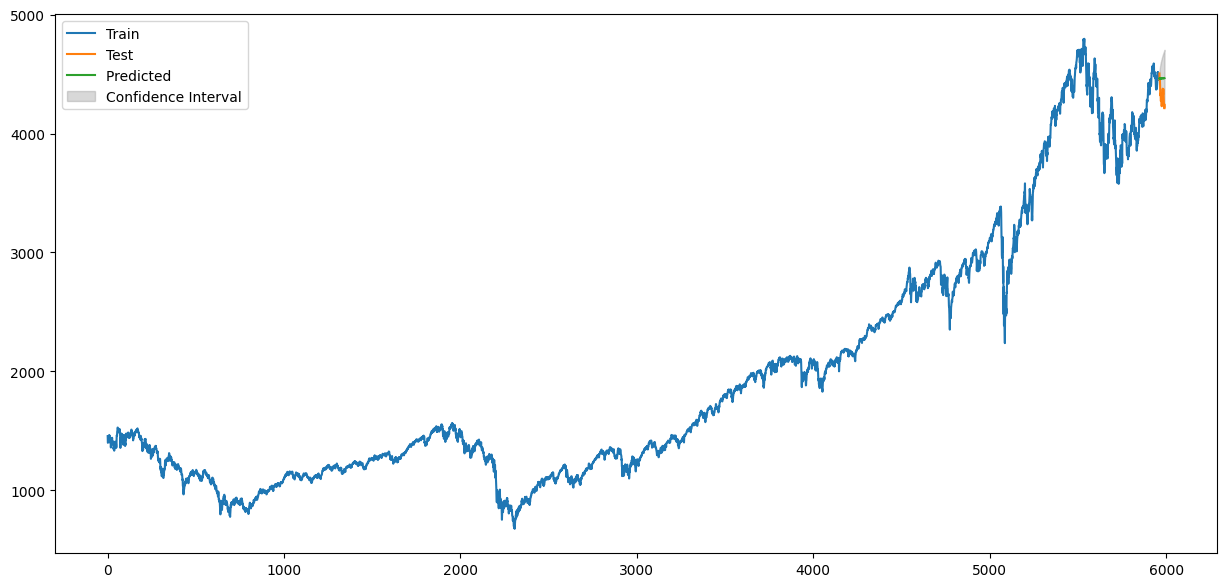

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [15,7]
plt.plot( train, label='Train ')
plt.plot(test, label='Test ')
plt.plot(forecast, label='Predicted ')
plt.fill_between(df_conf.index, df_conf['Upper_bound'], df_conf['Lower_bound'], color='gray', alpha=0.3, label='Confidence Interval')
plt.legend(loc='best')
plt.show()

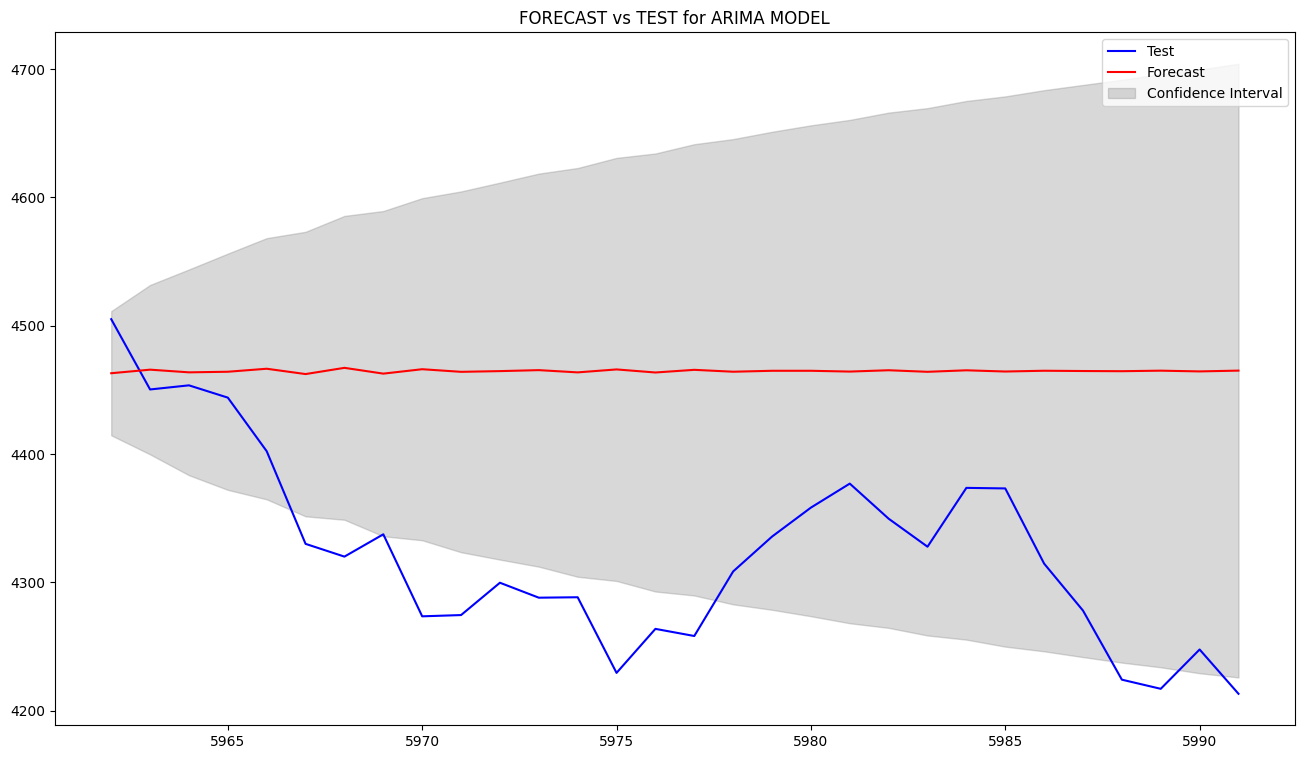

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('FORECAST vs TEST for ARIMA MODEL')
plt.plot(test, label='Test', color='blue')
plt.plot(forecast, label='Forecast', color='red')
plt.fill_between(df_conf.index, df_conf['Upper_bound'], df_conf['Lower_bound'], color='gray', alpha=0.3, label='Confidence Interval')
plt.legend()
plt.show()


###**CNN MODEL**

In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import pandas as pd

In [ ]:
def train_split_sequence(sequence, steps):
  X, y = list(), list()
  for start in range(0, len(sequence)-30):
    end_index = start + steps
    if end_index > len(sequence)-1:
      break
    sequence_x, sequence_y = sequence[start: end_index], sequence[end_index]
    X.append(sequence_x)
    y.append(sequence_y)
  return array(X), array(y)


def test_split_sequence(sequence, steps):
  X, y = list(), list()
  for start in range(len(sequence)-30, len(sequence)):
    end_index = start + steps
    if end_index > len(sequence)-1:
      break
    sequence_x, sequence_y = sequence[start: end_index], sequence[end_index]
    X.append(sequence_x)
    y.append(sequence_y)
  return array(X), array(y)

In [ ]:
raw_sequence = df['Close']
steps = 30

X, y = train_split_sequence(raw_sequence, steps)

In [ ]:
print("**************************************")
print("The input to the CNN :\n", raw_sequence)
print("**************************************")
print("The features (X), lagged values of time series, for our CNN Model")
print(X)
print("**************************************")
print("The respective observed values (y) of sequence for training our CNN Model")
print(y)
print("**************************************")

**************************************
The input to the CNN :
 0       1455.219971
1       1399.420044
2       1402.109985
3       1403.449951
4       1441.469971
           ...     
5987    4278.000000
5988    4224.160156
5989    4217.040039
5990    4247.680176
5991    4213.169922
Name: Close, Length: 5992, dtype: float64
**************************************
The features (X), lagged values of time series, for our CNN Model
[[1455.2199707  1399.42004395 1402.10998535 ... 1416.82995605
  1387.11999512 1389.93994141]
 [1399.42004395 1402.10998535 1403.44995117 ... 1387.11999512
  1389.93994141 1402.05004883]
 [1402.10998535 1403.44995117 1441.4699707  ... 1389.93994141
  1402.05004883 1387.67004395]
 ...
 [4487.45996094 4461.89990234 4467.43994141 ... 4314.60009766
  4278.         4224.16015625]
 [4461.89990234 4467.43994141 4505.10009766 ... 4278.
  4224.16015625 4217.04003906]
 [4467.43994141 4505.10009766 4450.31982422 ... 4224.16015625
  4217.04003906 4247.68017578]]
**************

In [ ]:
features = 1
X = X.reshape((X.shape[0], X.shape[1], features))

print("After reshaping, the shape of input X")
print(X.shape)
print("**************************************")
print("**************************************")
print("The final form of input feature matrix X is")
print(X)
print("**************************************")
print("**************************************")
print("Feature matrix X is ready for input to CNN model. We have used feature engineering to convert\n"
,"a sequence to matrix with image matrix shape to find patterns in sequence")
print("**************************************")
print("**************************************")

After reshaping, the shape of input X
(5962, 30, 1)
**************************************
**************************************
The final form of input feature matrix X is
[[[1455.2199707 ]
  [1399.42004395]
  [1402.10998535]
  ...
  [1416.82995605]
  [1387.11999512]
  [1389.93994141]]

 [[1399.42004395]
  [1402.10998535]
  [1403.44995117]
  ...
  [1387.11999512]
  [1389.93994141]
  [1402.05004883]]

 [[1402.10998535]
  [1403.44995117]
  [1441.4699707 ]
  ...
  [1389.93994141]
  [1402.05004883]
  [1387.67004395]]

 ...

 [[4487.45996094]
  [4461.89990234]
  [4467.43994141]
  ...
  [4314.60009766]
  [4278.        ]
  [4224.16015625]]

 [[4461.89990234]
  [4467.43994141]
  [4505.10009766]
  ...
  [4278.        ]
  [4224.16015625]
  [4217.04003906]]

 [[4467.43994141]
  [4505.10009766]
  [4450.31982422]
  ...
  [4224.16015625]
  [4217.04003906]
  [4247.68017578]]]
**************************************
**************************************
Feature matrix X is ready for input to CNN mod

In [ ]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(steps, features)))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(100, activation="relu"))
model.add(Dense(1))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 29, 64)            192       
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 14, 64)            0         
 g1D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 896)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               89700     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 89993 (351.54 KB)
Trainable params: 89993 (351.54 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
model.compile(optimizer="adam", loss="mse")

In [ ]:
model.fit(X, y, epochs=50, verbose=1)

Epoch 1/50
187/187 [==============================] - 10s 4ms/step - loss: 90471.1406
Epoch 2/50
187/187 [==============================] - 1s 4ms/step - loss: 5792.1846
Epoch 3/50
187/187 [==============================] - 1s 6ms/step - loss: 5448.8560
Epoch 4/50
187/187 [==============================] - 1s 6ms/step - loss: 4899.8354
Epoch 5/50
187/187 [==============================] - 1s 5ms/step - loss: 4657.8892
Epoch 6/50
187/187 [==============================] - 1s 6ms/step - loss: 4319.9512
Epoch 7/50
187/187 [==============================] - 1s 4ms/step - loss: 3850.1445
Epoch 8/50
187/187 [==============================] - 1s 4ms/step - loss: 3405.6060
Epoch 9/50
187/187 [==============================] - 1s 4ms/step - loss: 3619.6753
Epoch 10/50
187/187 [==============================] - 1s 4ms/step - loss: 3629.7446
Epoch 11/50
187/187 [==============================] - 1s 4ms/step - loss: 2957.7490
Epoch 12/50
187/187 [==============================] - 1s 4ms/step - los

In [ ]:
x_test, y_test = train_split_sequence(raw_sequence, steps)

x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], features))
y_pred = model.predict(x_test, verbose=0)

print(f"The next predicted output vs original is:")
data = pd.DataFrame(y_pred, columns=['y_pred'])
data["y_test"] = y_test
data.head()

The next predicted output vs original is:


,y_pred,y_test
0,1387.125610,1402.050049
1,1375.458130,1387.670044
2,1389.937378,1388.260010
3,1377.055420,1346.089966
4,1376.573975,1352.170044


In [ ]:
timeseries_evaluation_metrics_func(y_test, y_pred , 'CNN')

Evaluation metric results for CNN:-
MSE is : 2277.312078489797
MAE is : 36.14603207807979
RMSE is : 47.721191084148316
MAPE is : 61.58274720993321
R2 is : 0.997908690789988



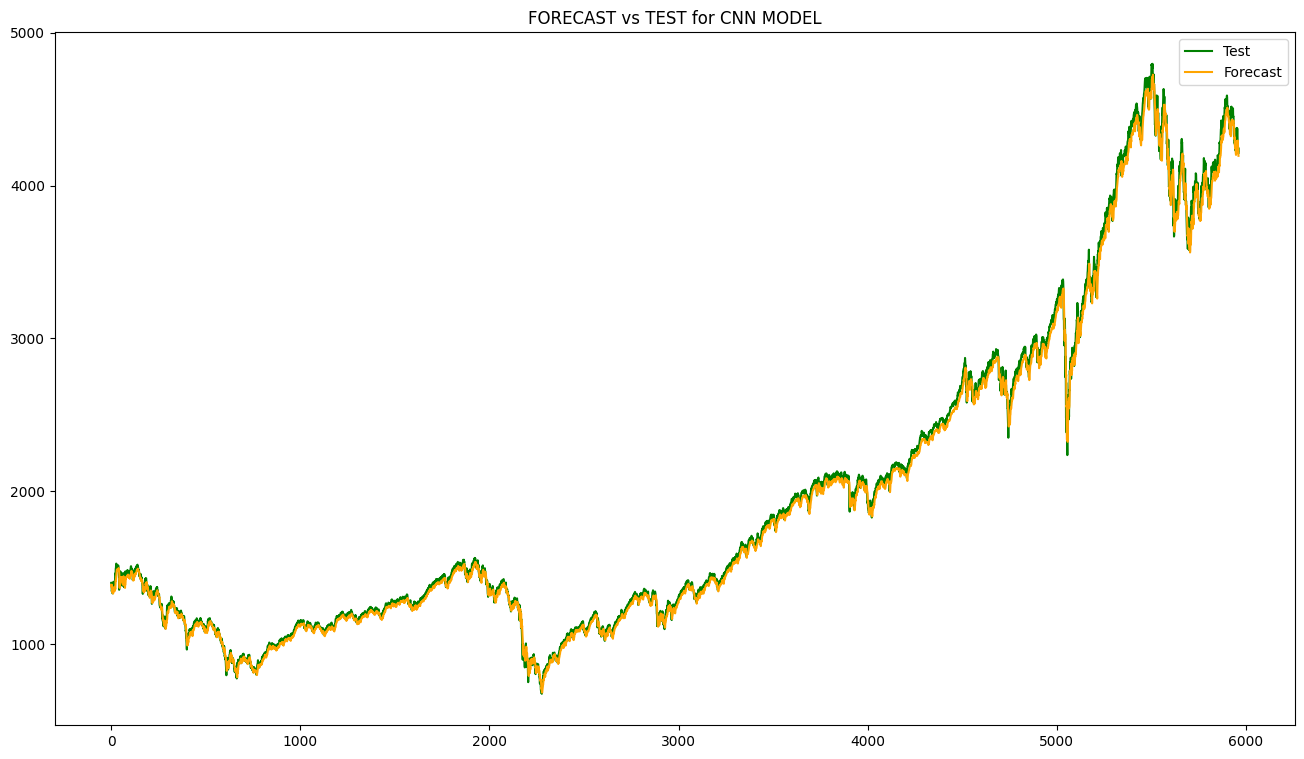

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('FORECAST vs TEST for CNN MODEL')
plt.plot(y_test, label='Test',color='green')
plt.plot(y_pred, label='Forecast',color='orange')
plt.legend()
plt.show()


###**GARCH MODEL**

In [ ]:
!pip install arch -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 9.8 MB/s eta 0:00:00


In [ ]:
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

In [ ]:
def garch(column_name,p,q):
  print("\n",column_name, "Graph")
  df[column_name].plot(figsize=(15, 6))
  plt.xlabel("Date")
  plt.ylabel(column_name)
  plt.title(column_name)
  plt.show()

  new_df = df[column_name]

  print("\nPACF Graph")
  plot_pacf(new_df)
  plt.show()

  test_size = 30
  train, test = new_df[:-test_size], new_df[-test_size:]

  model = arch_model(train, p=p, q=q)
  model_fit = model.fit()
  print(model_fit.summary())
  forecast = model_fit.forecast()
  # forecast = pd.DataFrame(forecast,columns=['close_pred'])
  return forecast

def predict_volatility(column_name, p, q):
  new_df = df[column_name]
  rolling_predictions = []
  test_size = 30

  for i in range(test_size):
    train = new_df[:-(test_size-i)]

    model = arch_model(train, p=p, q=q)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

  rolling_predictions = pd.Series(rolling_predictions, index=new_df.index[-test_size:])
  # print(rolling_predictions)

  plt.figure(figsize=(10,4))
  true, = plt.plot(df[column_name][-test_size:])
  preds, = plt.plot(rolling_predictions)
  plt.title(f'Volatility Prediction - Rolling forecast for GARCH[{p}, {q}]', fontsize=20)
  plt.legend([ 'True Volatility', 'Predicted Volatility'], fontsize=16)
  return rolling_predictions


 Close Graph


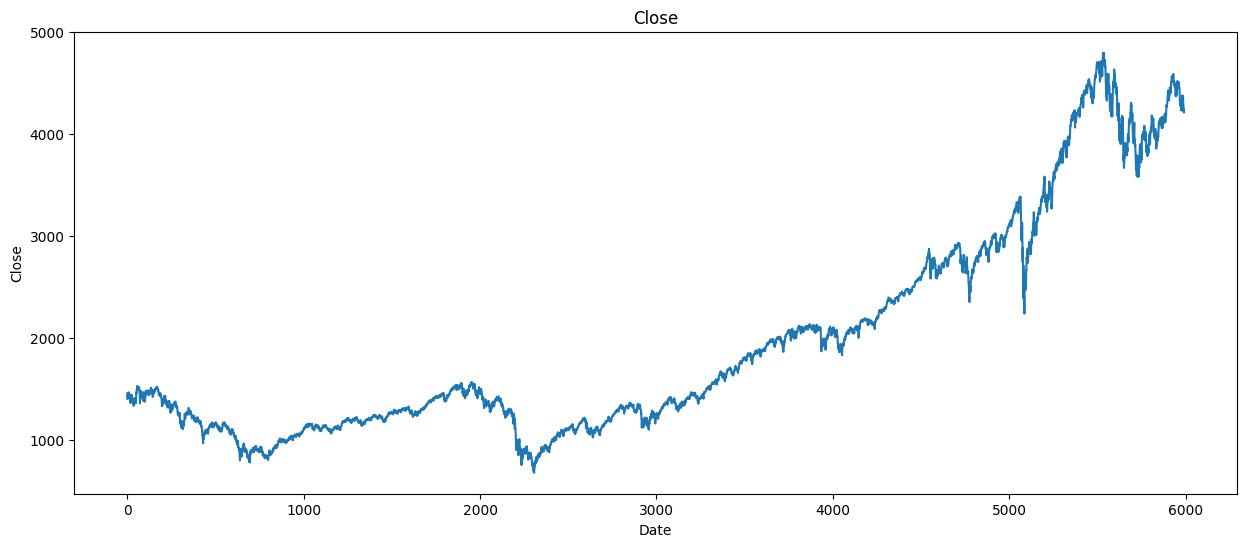


PACF Graph


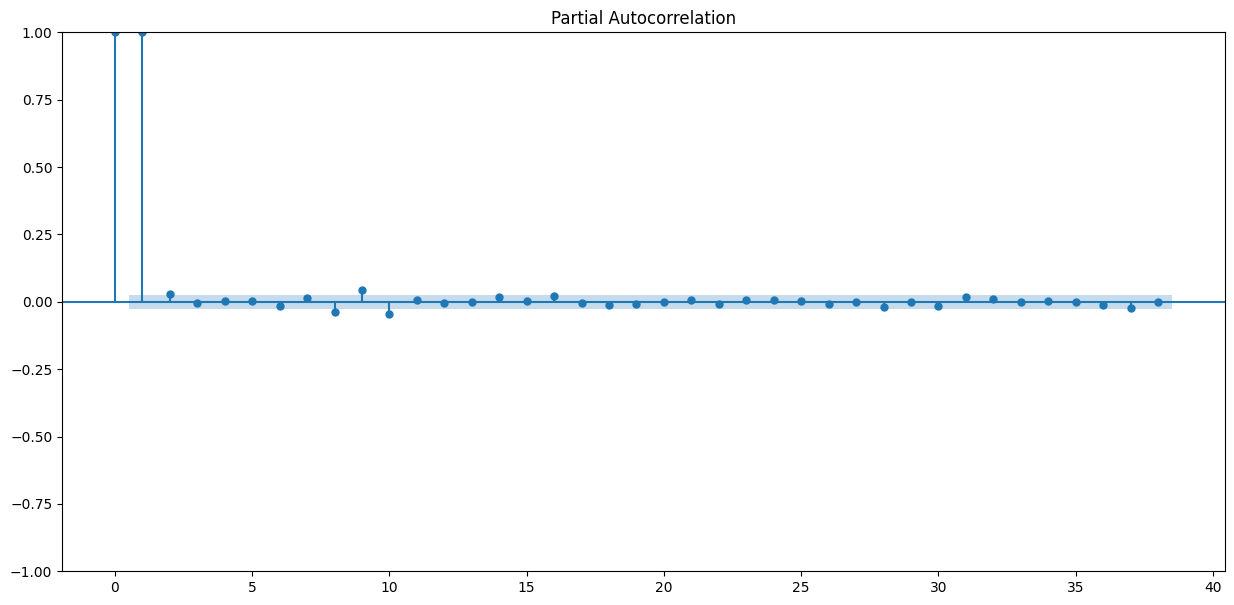

Iteration:      1,   Func. Count:      7,   Neg. LLF: 184220.5055534581
Iteration:      2,   Func. Count:     15,   Neg. LLF: 46966.876173193865
Iteration:      3,   Func. Count:     21,   Neg. LLF: 58380.691259742205
Iteration:      4,   Func. Count:     28,   Neg. LLF: 60616.78184747088
Iteration:      5,   Func. Count:     36,   Neg. LLF: 52950.317504984705
Iteration:      6,   Func. Count:     44,   Neg. LLF: 44375.923726455236
Iteration:      7,   Func. Count:     50,   Neg. LLF: 44374.40437091588
Iteration:      8,   Func. Count:     56,   Neg. LLF: 44367.11871977059
Iteration:      9,   Func. Count:     62,   Neg. LLF: 44357.379124782194
Iteration:     10,   Func. Count:     68,   Neg. LLF: 44356.34993450561
Iteration:     11,   Func. Count:     74,   Neg. LLF: 44356.30220786434
Iteration:     12,   Func. Count:     80,   Neg. LLF: 44356.30110826962
Iteration:     13,   Func. Count:     86,   Neg. LLF: 44356.29797134329
Iteration:     14,   Func. Count:     92,   Neg. LLF: 44356

In [ ]:
forecast = garch("Close", 1 ,2)
print("\nPredicting volatility")

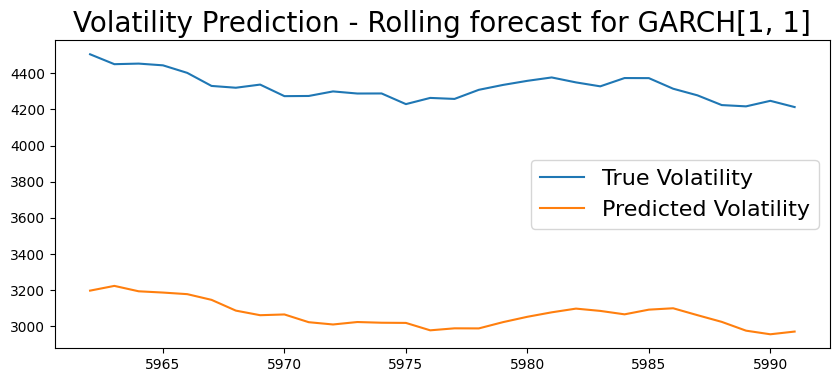

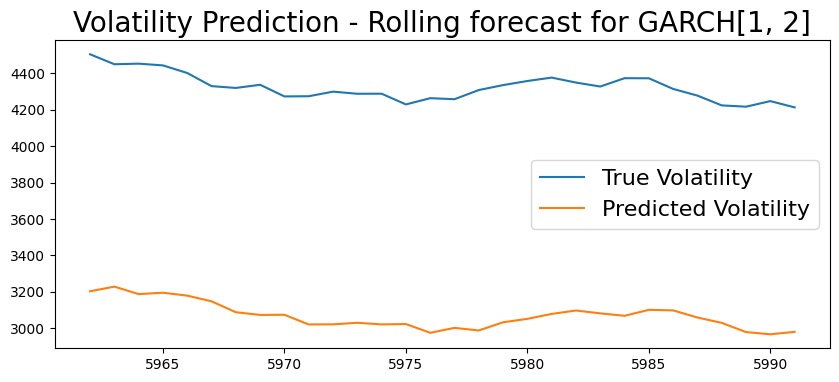

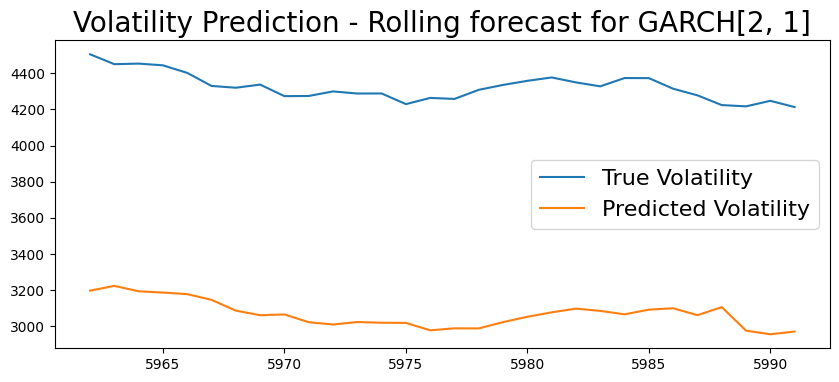

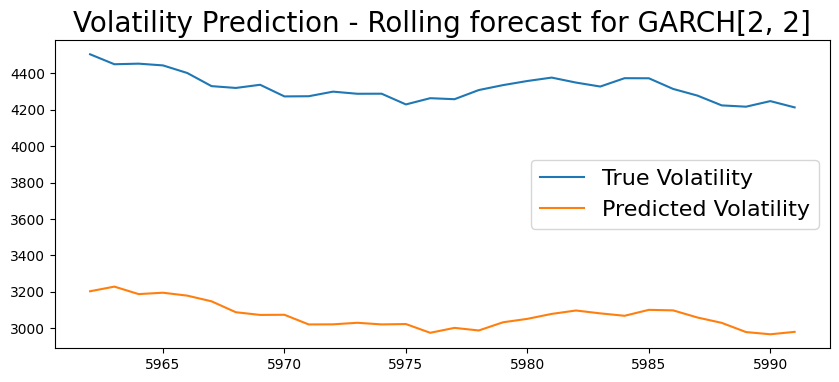

In [ ]:
for i in range(2):
  for j in range(2):
    predict_volatility("Close", i+1, j+1)

In [ ]:
X = df[['Close' ]]
train, test = X[0:-30], X[-30:]

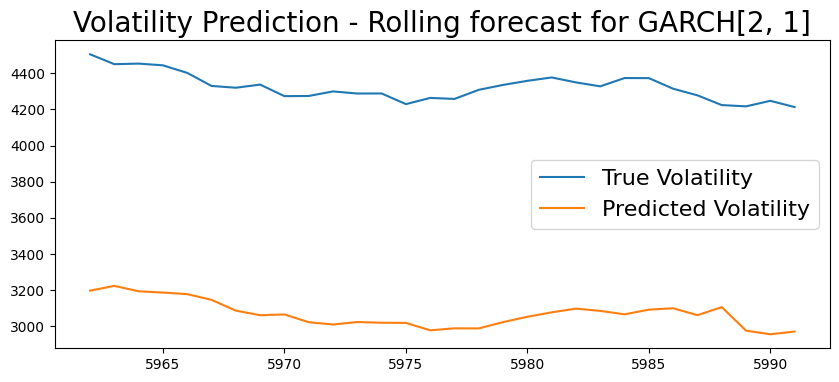

In [ ]:
forecast = predict_volatility("Close", 2, 1)

In [ ]:
timeseries_evaluation_metrics_func(test, forecast , 'ARCH/GARCH')

Evaluation metric results for ARCH/GARCH:-
MSE is : 1576488.8656642446
MAE is : 1254.8314484193388
RMSE is : 1255.5830779618864
MAPE is : 29.00053004495977
R2 is : -289.25425549295926



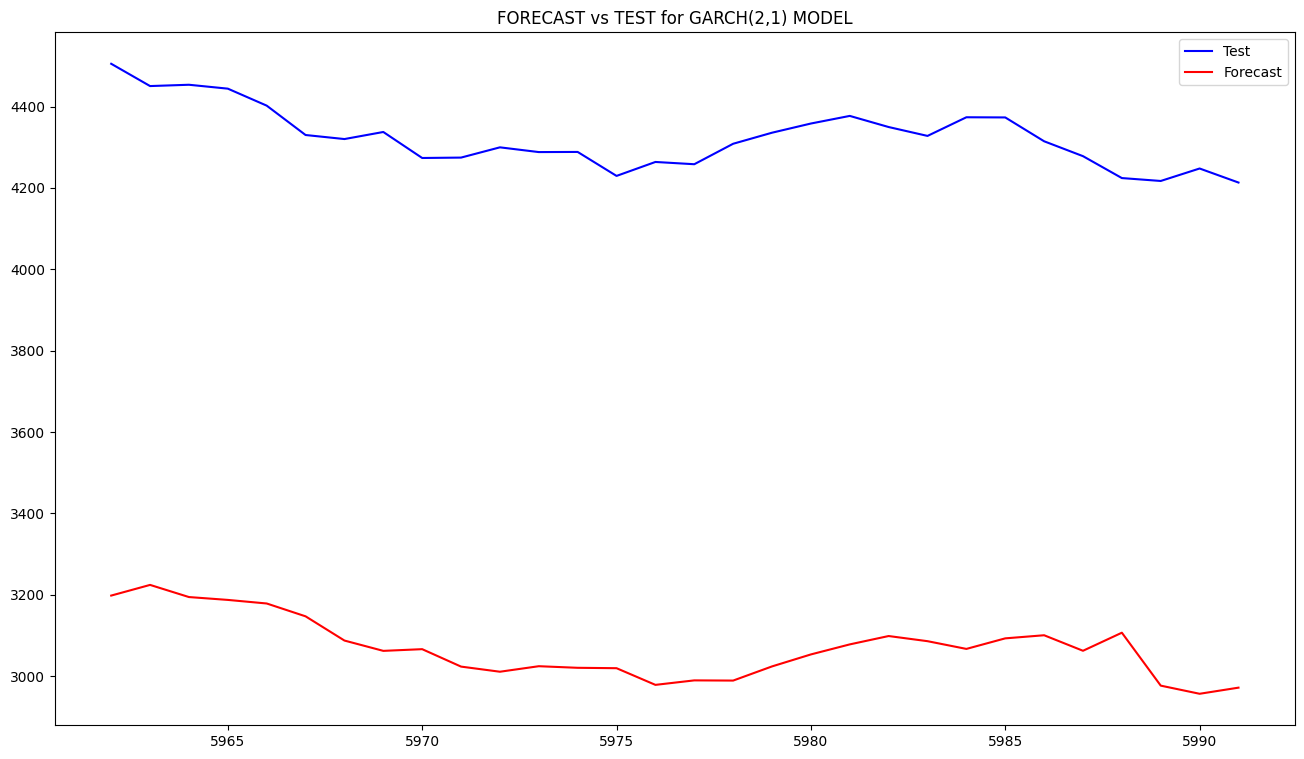

In [ ]:
plt.figure(figsize=(16, 9))
plt.title('FORECAST vs TEST for GARCH(2,1) MODEL')
plt.plot(test, label='Test', color='blue')
plt.plot(forecast, label='Forecast', color='red')
plt.legend()
plt.show()

##**CHAPTER 10 : REASONS FOR SELECTION OF MODEL**

In our pursuit of accurate forecasting for the S&P 500 dataset, we explored the application of several time series models, including ARIMA, CNN, and GARCH.

Following a meticulous evaluation process, the CNN model emerged as the preferred choice due to its superior performance and suitability for the dataset's characteristics.

1. **Absence of Seasonality:** The S&P 500 dataset displayed no discernible seasonal patterns, reducing the relevance of models like SARIMA, typically used for handling seasonal variations. The absence of pronounced cyclic behaviors simplified the modeling process.

2. **Non-Stationarity Addressed:** Although the dataset initially exhibited non-stationarity, it can be made stationary through differencing methods. The transformation ensures that the temporal dependencies within the data are captured effectively, allowing for a more suitable application of time series models.

3. **Model Flexibility in Stationary Data:** The data, after being made stationary, opens avenues for considering various modeling approaches, including AR, MA, ARIMA, or CNN. This flexibility enables a comprehensive comparison among different models.

4. **Comparative Performance Evaluation:** A thorough comparison between ARIMA and CNN models was conducted. Despite the non-stationarity issue being resolved, both models were evaluated. The CNN model emerged as the superior choice, exhibiting notably better forecasting accuracy in contrast to ARIMA.

5. **Complex Pattern Recognition:** CNN models excel in identifying intricate patterns and capturing non-linear relationships within sequential data. This proficiency was advantageous in uncovering nuanced features inherent in the S&P 500 time series.

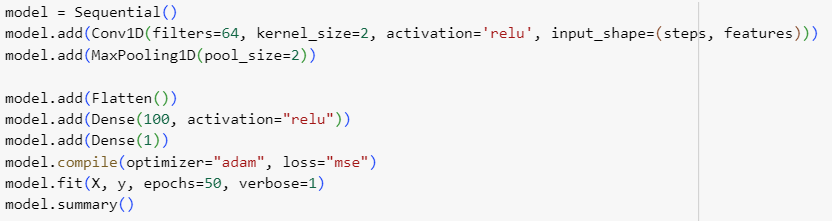

**Model Summary of CNN :**


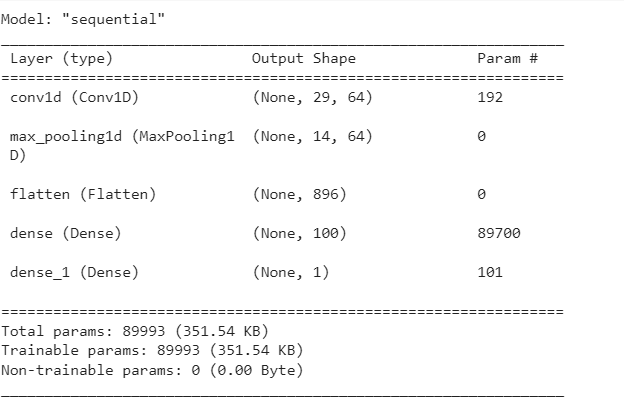

**Error Metrics for CNN model :**

MSE is : 1478.938031796011

MAE is : 27.16267279849201

RMSE is : 38.4569633720086

MAPE is : 62.0108365696071

R2 is : 0.998641856442889

##**CHAPTER 11 : COMPARATIVE ANALYSIS**

1. **MSE (Mean Squared Error):** Measures the average squared difference between predicted values and actual values, emphasizing larger errors more than smaller ones.

2. **MAE (Mean Absolute Error):** Represents the average of absolute differences between predicted and actual values, providing a direct measure of forecasting accuracy.

3. **RMSE (Root Mean Squared Error):** Similar to MSE but provides an interpretable value in the same units as the forecasted values by taking the square root of MSE.

4. **MAPE (Mean Absolute Percentage Error):** Measures the average of absolute percentage differences between predicted and actual values, expressing errors as a percentage of actual values.

5. **R^2 (Coefficient of Determination):** Indicates the proportion of variance in the dependent variable that is predictable from the independent variable(s), providing an assessment of model fit.

This function below is common function used by different model to
evaluate the performance of each model:

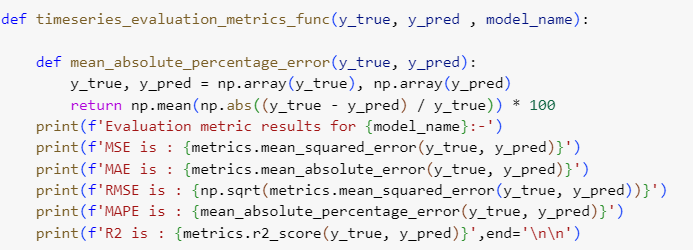

Comparison of ARIMA, CNN & ARCH were done on the above
mentioned error metrics & based on that the final model was
selected for prediction.

**Evaluation metric results for ARIMA:-**

MSE is : 25278.574114506464

MAE is : 143.58094063666155

RMSE is : 158.99237124625338

MAPE is : 3.3478365598869866

R2 is : -3.6541487664983734

---

**Evaluation metric results for CNN:-**

MSE is : 1478.938031796011

MAE is : 27.16267279849201

RMSE is : 38.4569633720086

MAPE is : 62.0108365696071

R2 is : 0.998641856442889

---


**Evaluation metric results for ARCH/GARCH:-**

MSE is : 1376845.2264514267

MAE is : 1172.7981094082004

RMSE is : 1173.3904833649483

MAPE is : 27.10276789372764

R2 is : -252.4969924854558

**Thus,the comparative analysis shows that CNN performs the best ,
whereas ARCH performs the worst.**